In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as optimize
from glob import glob

%matplotlib inline

In [58]:
data_files = glob("Data/*.csv")
data_files.sort()
for (i, f) in enumerate(data_files):
    print(f"{i:3d}:{f}")
i_file = int(input("Enter file number: "))
data_file = data_files[i_file]
print(f"Opening data file {data_file}")

data = np.genfromtxt(data_file, comments='#')
t_sleep_ms = data[:,0]
freq = data[:,1]
avg_Vsig = data[:,2]
rms_Vsig = data[:,3]
avg_Vfilt = data[:,4]
rms_Vfilt = data[:,5]
n_points = len(freq)
print(f"There are {n_points} points")
base_name = data_file[data_file.rfind('/')+1:data_file.rfind('.')]
plot_file_fmt = "Figures/"+base_name+"_%02d.png"
i_plot = 0

  0:Data/2024-07-15-1470.csv
  1:Data/2024-07-26-1200.csv
  2:Data/2024-07-27T11:12-04:00.csv
  3:Data/2024-07-27T19:46-04:00.csv
  4:Data/2024-07-27T20:01-04:00.csv
  5:Data/2024-07-28T1751.csv


Enter file number:  5


Opening data file Data/2024-07-28T1751.csv
There are 4100 points


In [59]:
plot_file_fmt % i_plot

'Figures/2024-07-28T1751_00.png'

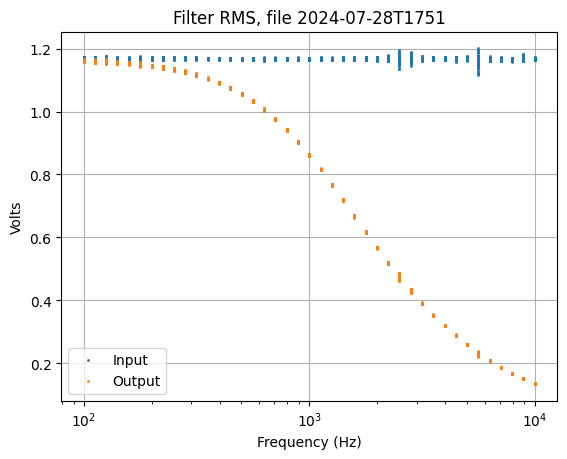

In [60]:
plt.plot(freq, rms_Vsig, '.', ms=2, label="Input")
plt.plot(freq, rms_Vfilt, '.', ms=2, label="Output")
plt.title(f"Filter RMS, file {base_name}")
plt.grid()
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.xscale('log')
plt.yscale('linear')
plt.ylabel("Volts")
plt.savefig(plot_file_fmt % i_plot)
i_plot += 1
pass

# Make Data Set vs. Frequency

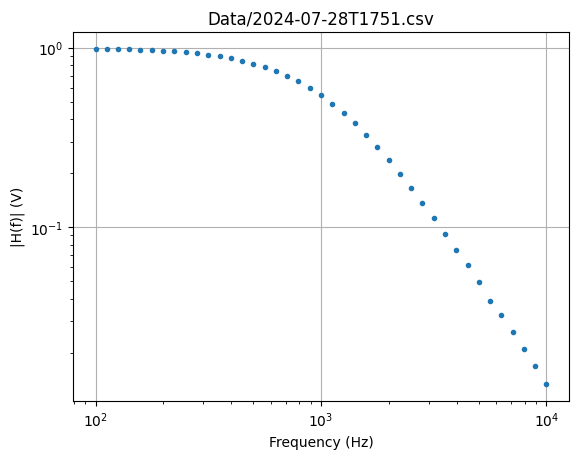

In [61]:
frs = np.array([f for f in set(freq[:100])])
frs.sort()

Amp2_filt = np.empty_like(frs)
Amp2_filt_std = np.empty_like(frs)
for i in range(len(frs)):
    Amp2_filt[i] = np.average(rms_Vfilt[freq == frs[i]]**2)
    Amp2_filt_std[i] = np.std(rms_Vfilt[freq == frs[i]]**2)
    
Amp2_sig_avg = np.average(rms_Vsig**2)
H2 = Amp2_filt / Amp2_sig_avg
H2_std = Amp2_filt_std / Amp2_sig_avg

plt.errorbar(frs, H2, H2_std, fmt='.')
plt.title(data_file)
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("|H(f)| (V)")

plt.savefig(plot_file_fmt % i_plot)
i_plot += 1


In [62]:
i_plot = 1

In [63]:
def H2_high_pass(fr, fr0):
    arg = (fr / fr0)**2
    return arg / (1.0 + arg)
    
def H2_low_pass(fr, fr0):
    arg = (fr / fr0)**2
    return 1.0 / (1.0 + arg)
    
out = optimize.curve_fit(H2_low_pass, frs, H2, p0=(1000, ), sigma=H2_std, absolute_sigma=True)
print(out)
fr0_fit = out[0][0]
fr0_sig = out[1][0][0]

model = H2_low_pass(frs, fr0_fit)

(array([1115.14880629]), array([[0.68347416]]))


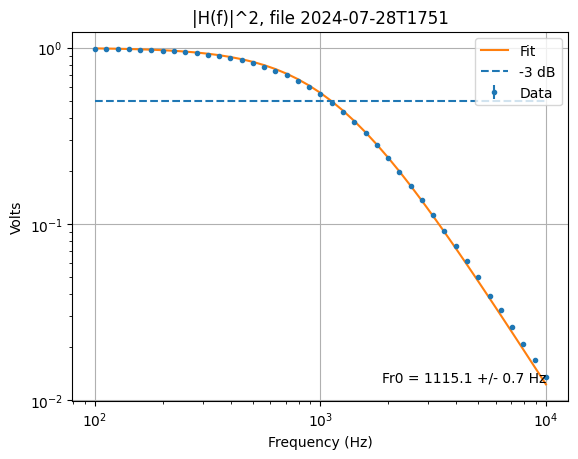

In [64]:
plt.errorbar(frs, H2, H2_std, fmt='.', label="Data")
plt.plot(frs, model, '-', label="Fit")
plt.hlines(0.5, frs[0], frs[-1], ls='--', label="-3 dB")
plt.title(f"|H(f)|^2, file {base_name}")
plt.grid()
plt.legend()
plt.text(frs[-1], min(model), f"Fr0 = {fr0_fit:.1f} +/- {fr0_sig:.1f} Hz", \
         ha='right', va='bottom')
plt.xlabel("Frequency (Hz)")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Volts")

plt.savefig(plot_file_fmt % i_plot)
i_plot += 1


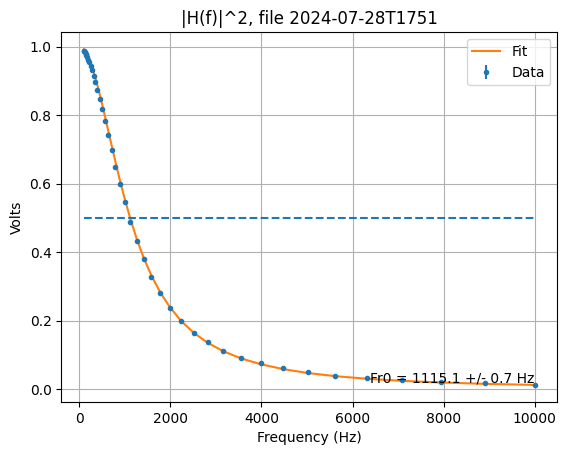

In [65]:
plt.errorbar(frs, H2, H2_std, fmt='.', label="Data")
plt.plot(frs, model, '-', label="Fit")
plt.hlines(0.5, frs[0], frs[-1], ls='--')
plt.title(f"|H(f)|^2, file {base_name}")
plt.grid()
plt.legend()
plt.text(frs[-1], min(model), f"Fr0 = {fr0_fit:.1f} +/- {fr0_sig:.1f} Hz", \
         ha='right', va='bottom')
plt.xlabel("Frequency (Hz)")
plt.xscale('linear')
plt.yscale('linear')
plt.ylabel("Volts")

plt.savefig(plot_file_fmt % i_plot)
i_plot += 1


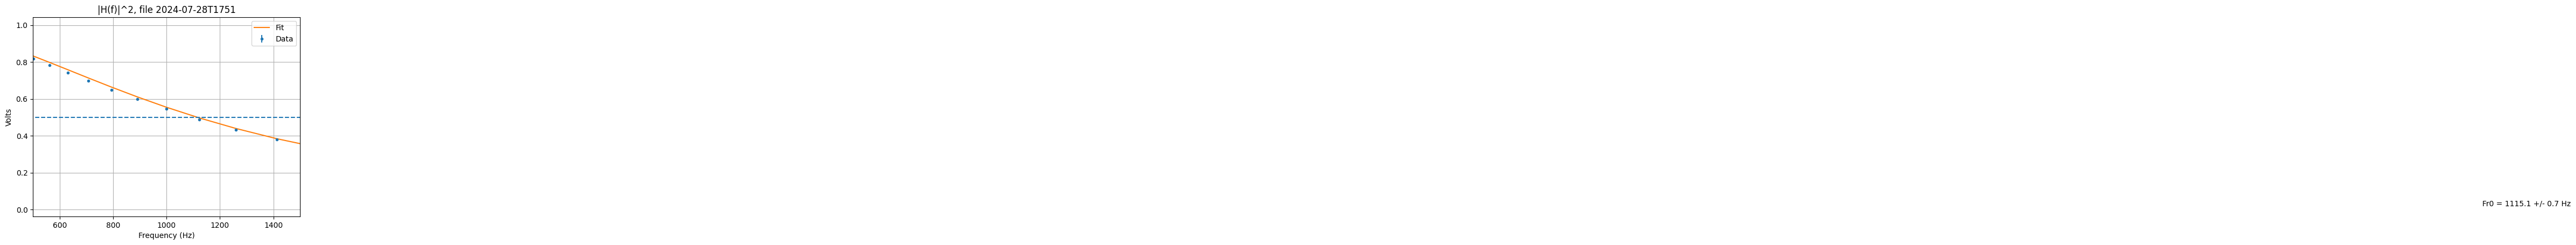